this notbook is the first step in a life cycle of ML project which is exploratory data analysis on the dataset to gain insights and make decission to what are the feature engineering steps to be taken for each feature in the feature engineering steps(handeling missing values, handelling outliers, removing duplicates, encoding and decoding, standerdization and normalization)


#import nessesary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%cd /content/drive/MyDrive/machine learning projects /salary_prediction

/content/drive/MyDrive/machine learning projects /salary_prediction


In [3]:
%pwd

'/content/drive/MyDrive/machine learning projects /salary_prediction'

In [4]:
%ls

 config.py        'Feature Engineering.ipynb'   __pycache__/
 custom_funcs.py   functions.ipynb             'Salary Prediction of Data Professions.csv'
 EDA.ipynb         functions.py


#read dataset

In [5]:
from config import data_path
df = pd.read_csv(data_path)

In [6]:
df.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


sample of the data 
   FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data col

/content/drive/MyDrive/machine learning projects /salary_prediction/custom_funcs.py:19: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('skewness of numerical data', df.skew())


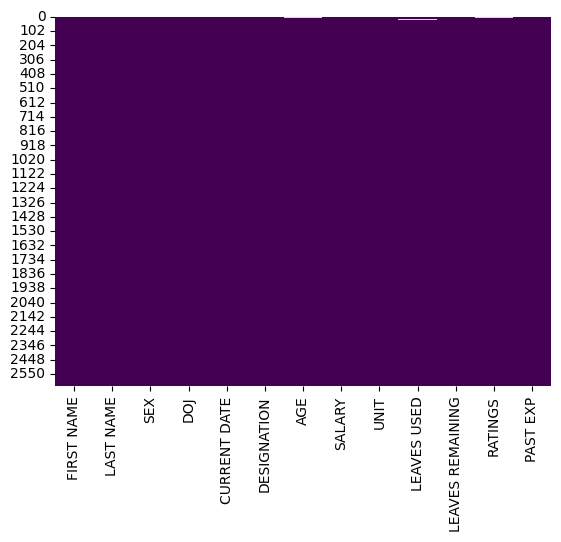

In [7]:
from custom_funcs import data_info
data_info(df)

In [25]:
df.dropna(inplace = True)

In [26]:
df['LEAVES USED'] + df['LEAVES REMAINING']

0       30.0
2       30.0
3       30.0
6       30.0
7       30.0
        ... 
2634    30.0
2635    30.0
2636    30.0
2637    30.0
2638    30.0
Length: 2631, dtype: float64

insight: the total sum of the leaves used and leaves reamining are 30 so if one of them is absent we can ge it by subtracting the present by 30

In [27]:
df[(df['LEAVES USED'].isna()) & (df['LEAVES REMAINING'].isna())].index.tolist()

[]

insight: there is no rows that have the two features missing, so by subtracting the present by 30 and filling the missing by that value, the missing values for these two features will be handeled

In [28]:
from custom_funcs import vis

<Figure size 700x500 with 0 Axes>

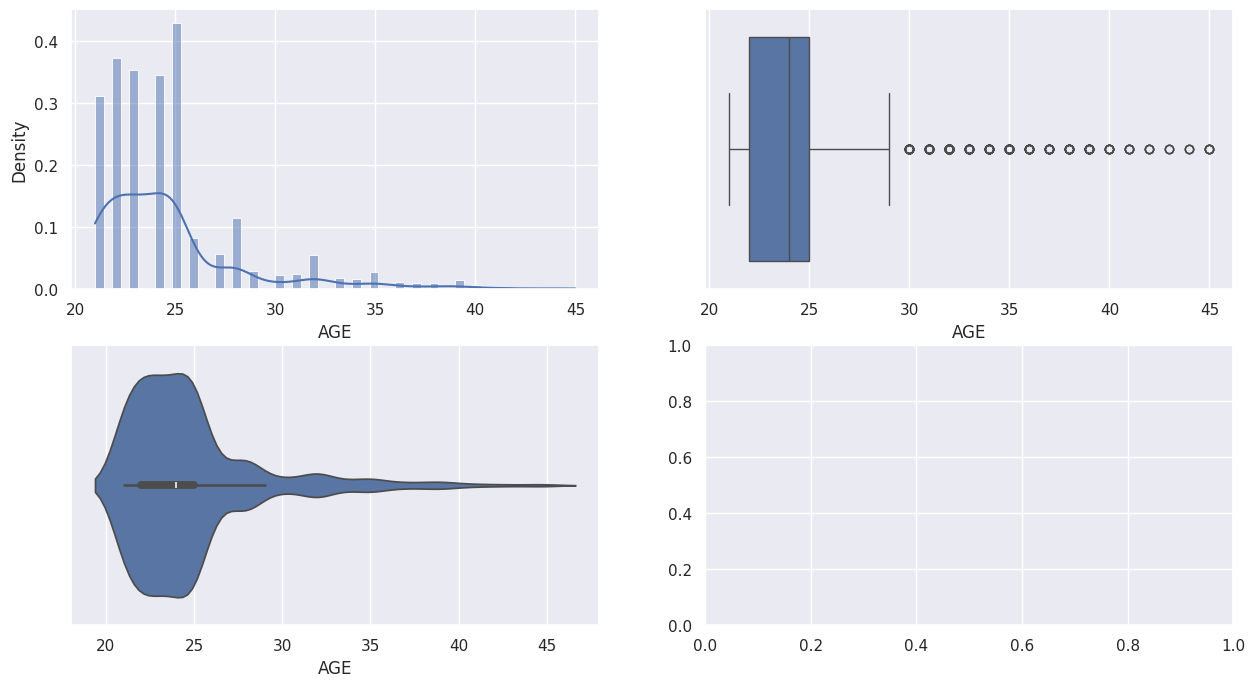

In [29]:
vis(df,'AGE')

age: continous numerical, 3missing values out of 2639, 0.001137 per will handel missing values by filling in with the median

<Figure size 700x500 with 0 Axes>

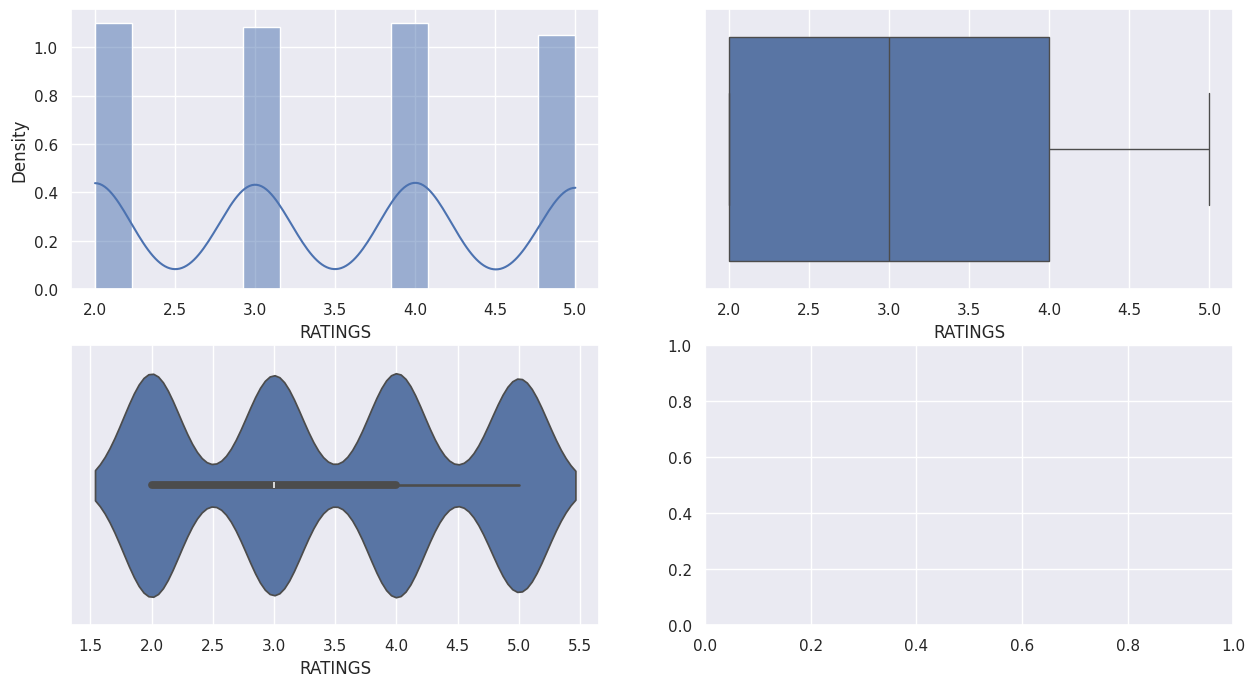

In [30]:
vis(df,'RATINGS')

ratings: categorical/discrete, numerical, 2 missing values out of 2639 ,0.000758 percent
will handel missing values by filling in with the mode value

#detect outliers

In [31]:
num_features = df.select_dtypes(include = 'number').columns.tolist()

<Axes: xlabel='PAST EXP'>

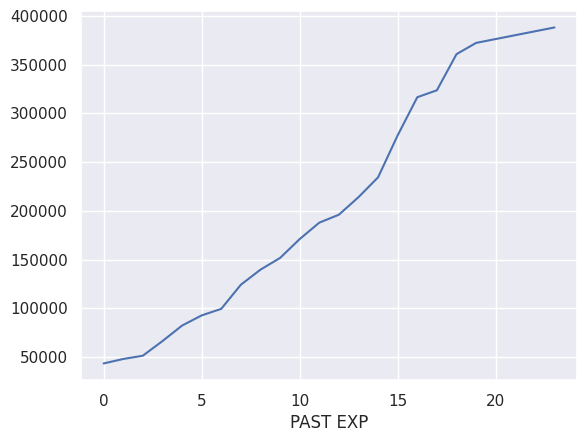

In [32]:
df.groupby('PAST EXP')['SALARY'].median().plot()

In [33]:
num_features

['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']

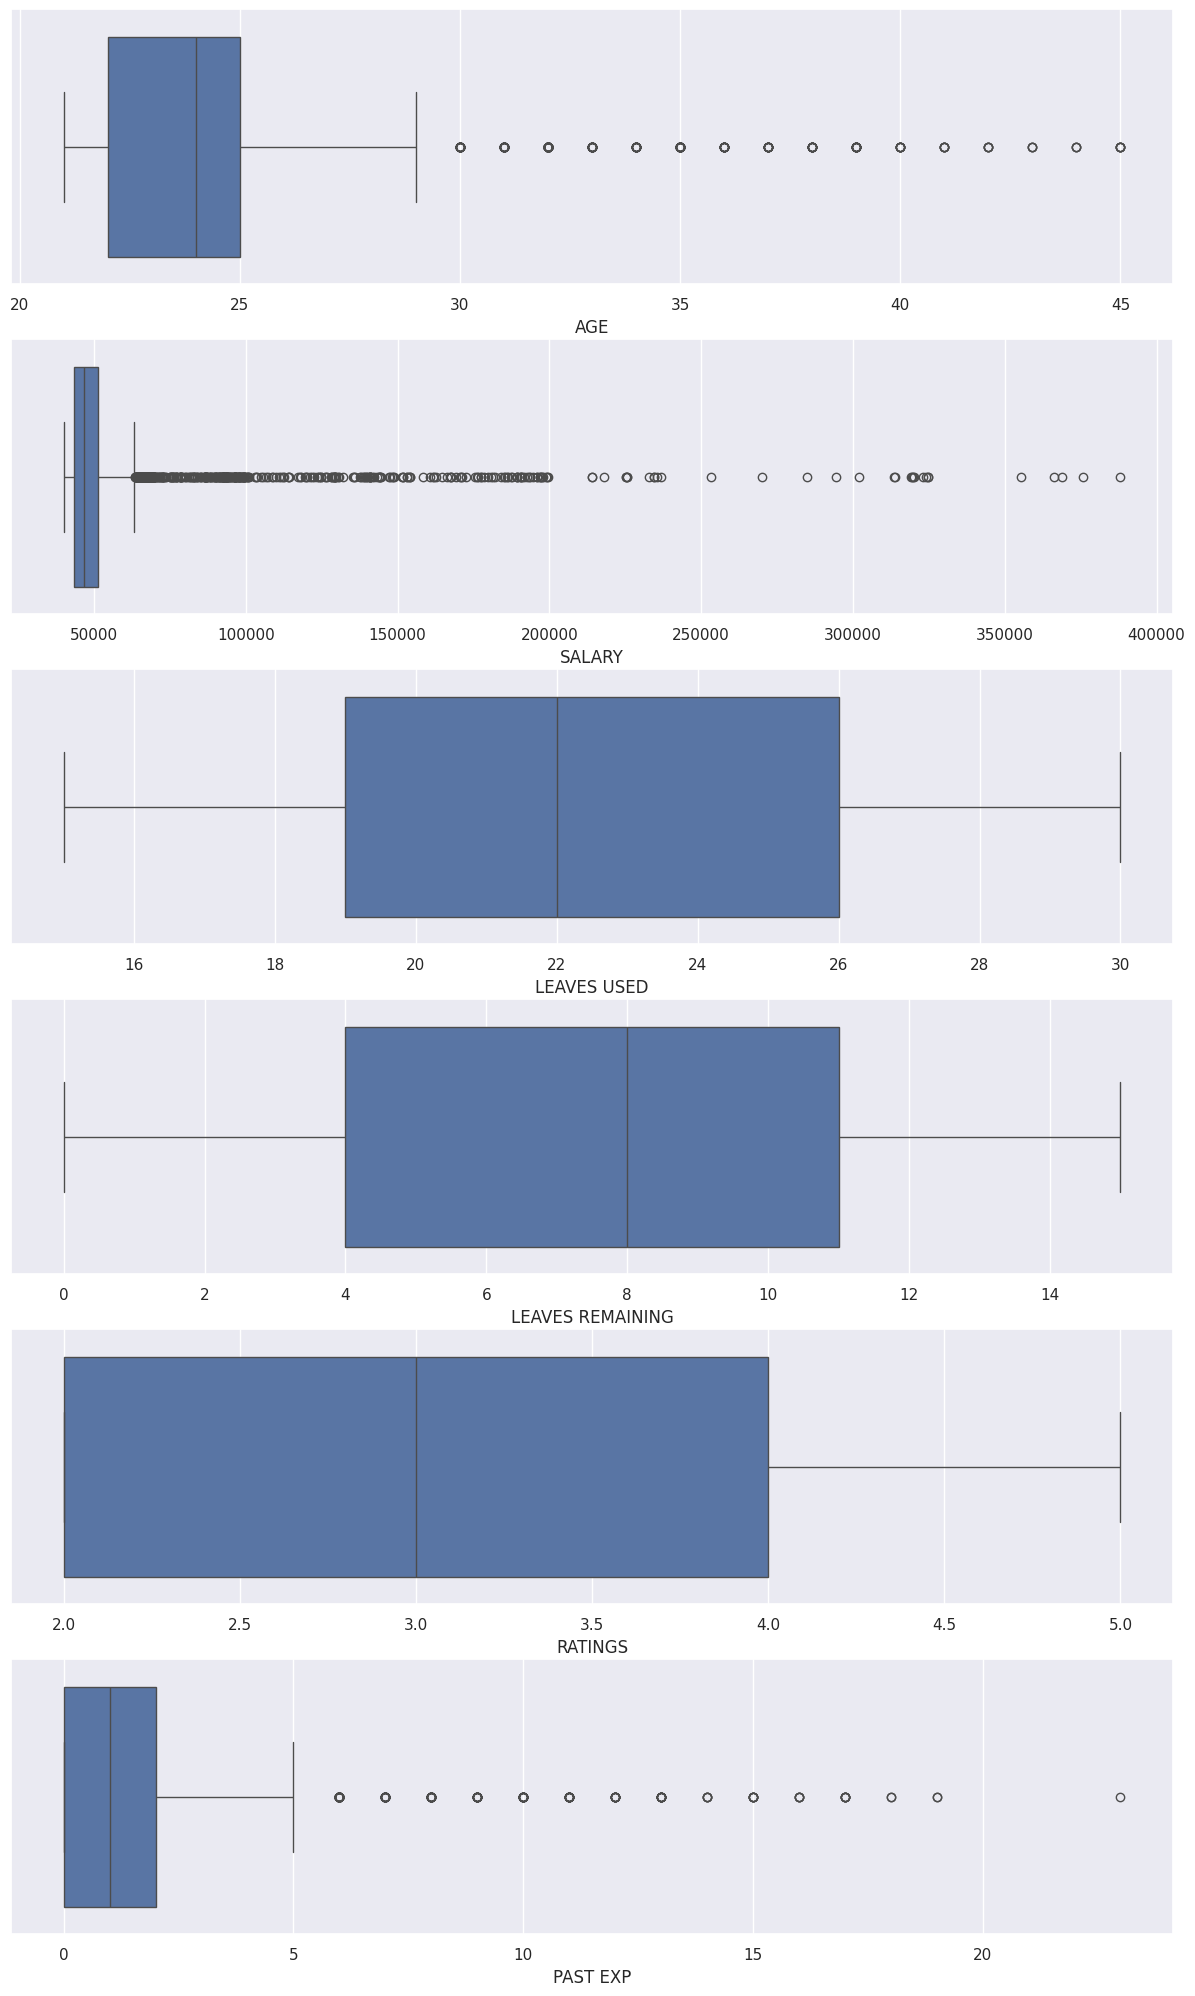

In [34]:
fig, axes = plt.subplots(len(num_features), figsize = (15,25))
for i, feature in enumerate(num_features):
  sns.boxplot(x = df[feature], ax = axes[i])
  plt.xlabel(feature)

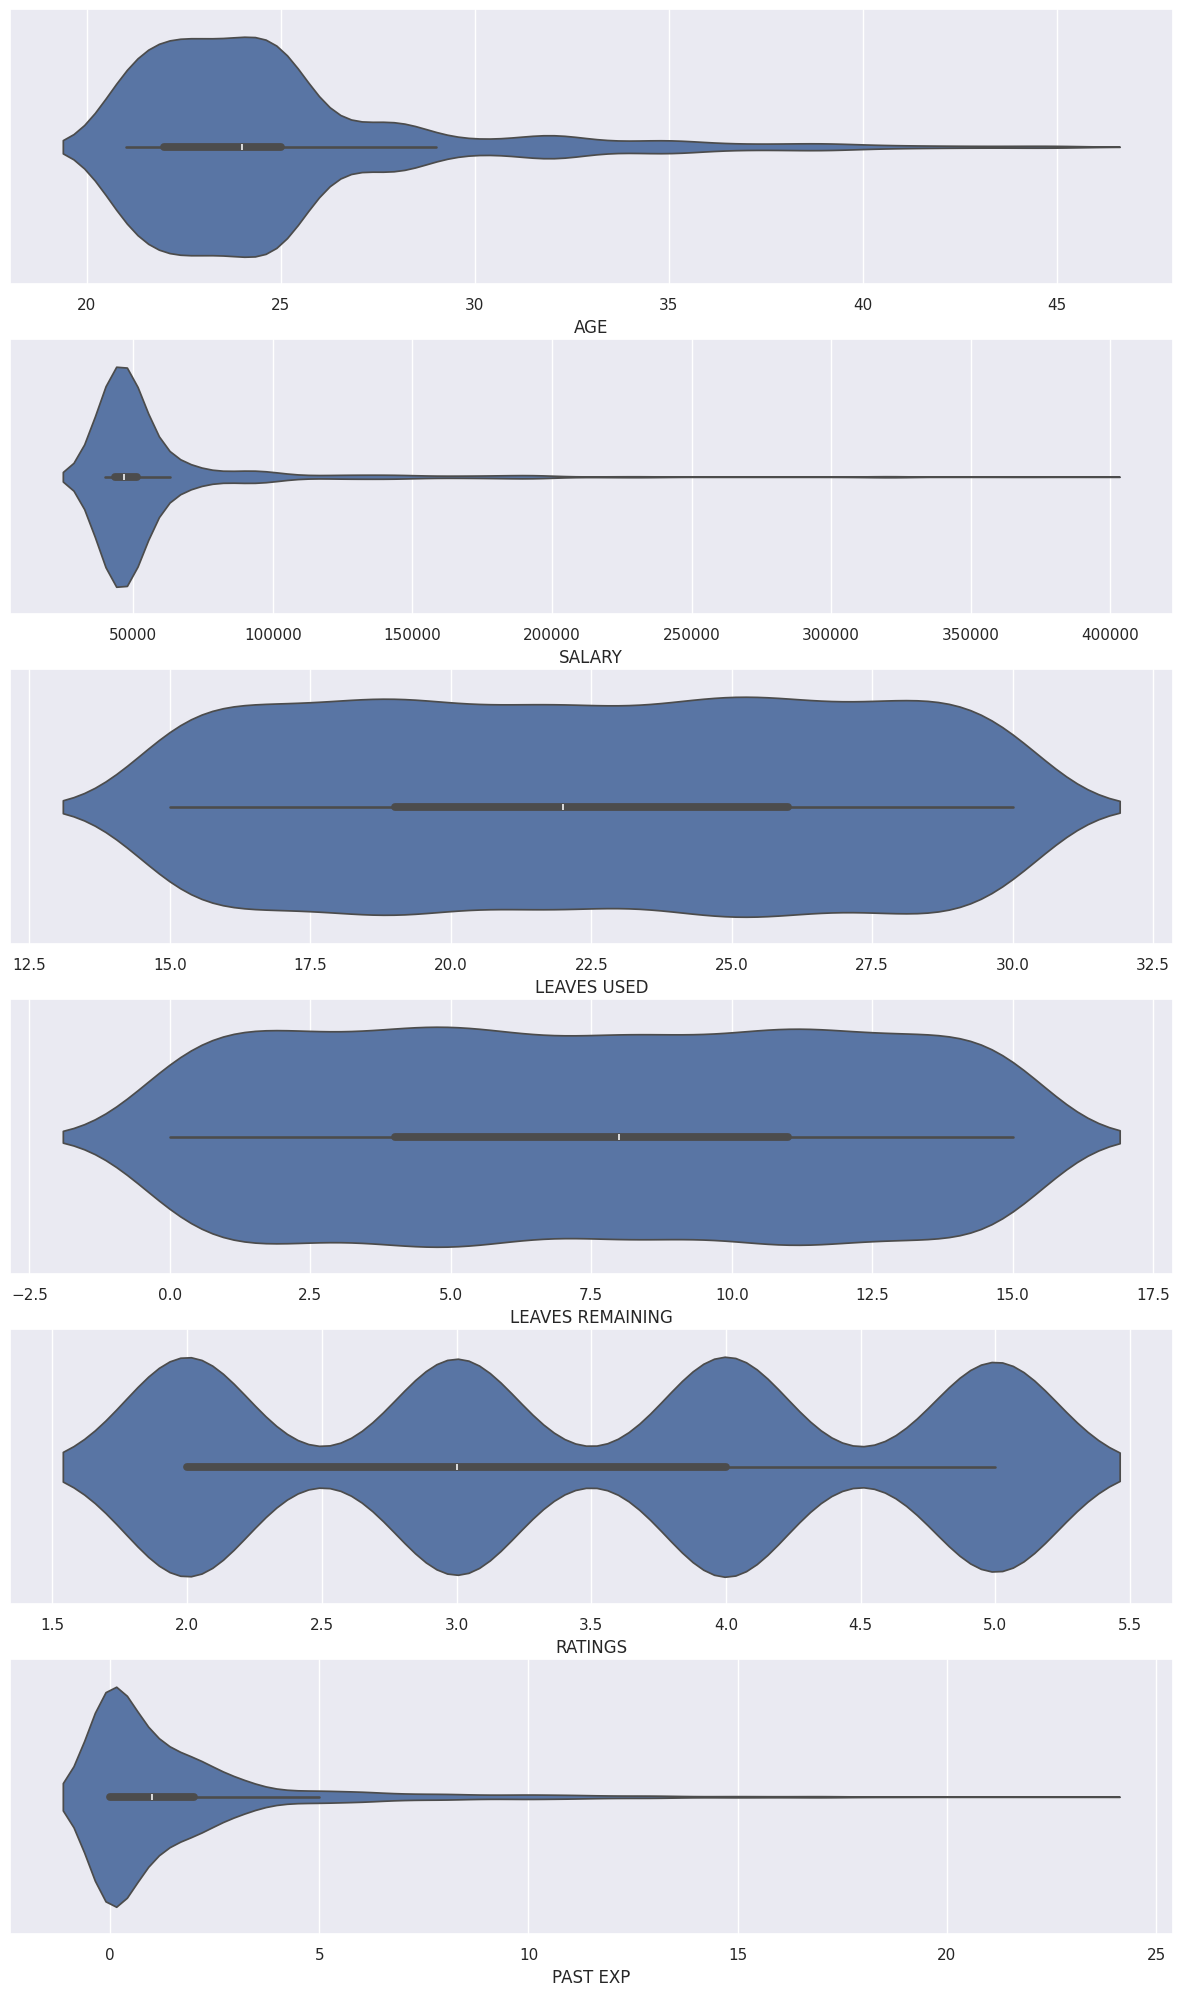

In [35]:
fig, axes = plt.subplots(len(num_features), figsize = (15,25))
for i, feature in enumerate(num_features):
  sns.violinplot(x = df[feature], ax = axes[i])
  plt.xlabel(feature)

insight: AGE - SALARY - PAST EXP have outliers

In [36]:
from custom_funcs import detect_outliers_iqr

------------------- AGE -------------------
Outliers of  AGE  from IQR method:  [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 3

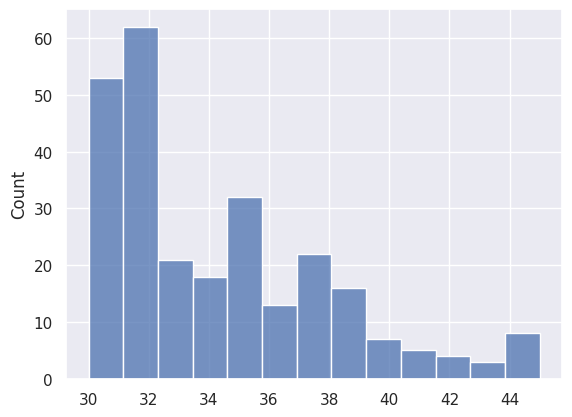

------------------- SALARY -------------------
Outliers of  SALARY  from IQR method:  [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 3

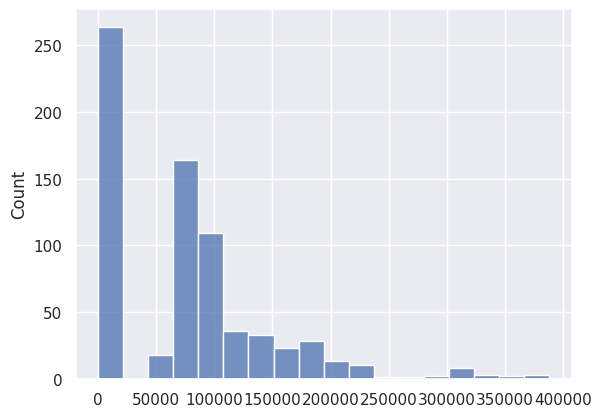

------------------- PAST EXP -------------------
Outliers of  PAST EXP  from IQR method:  [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.

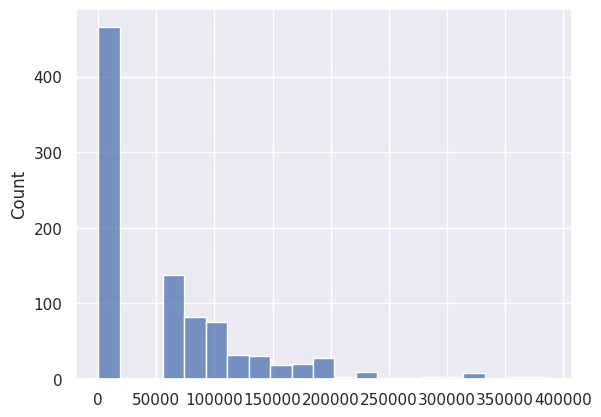

In [37]:
have_outliers = ['AGE', 'SALARY', 'PAST EXP']
detect_outliers_iqr(df,have_outliers)

#some plots

<Axes: xlabel='AGE'>

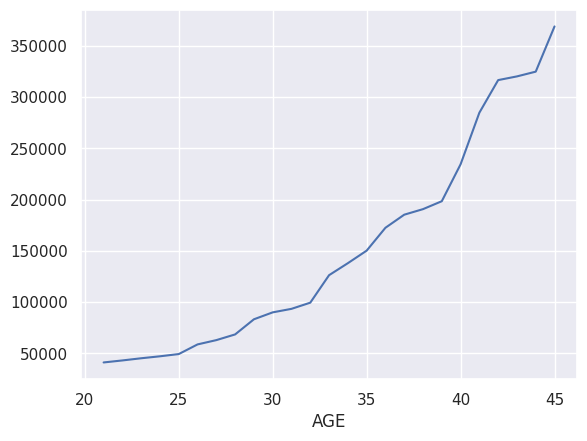

In [38]:
df.groupby('AGE')['SALARY'].median().plot()

<Axes: xlabel='DESIGNATION'>

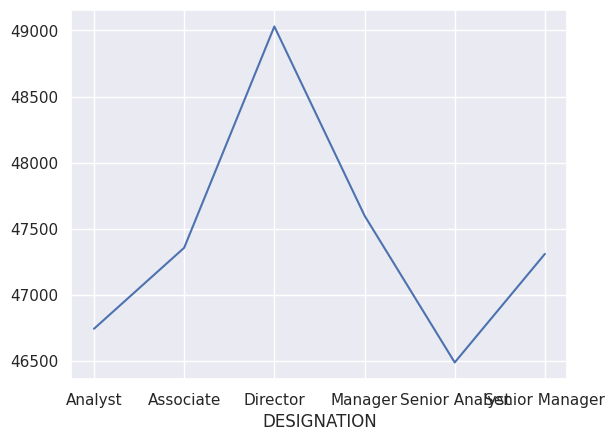

In [39]:
df.groupby('DESIGNATION')['SALARY'].median().plot()

<Axes: xlabel='UNIT'>

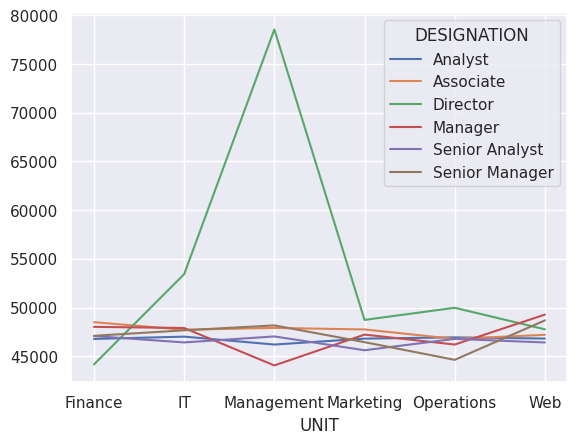

In [40]:
df.groupby(['UNIT', 'DESIGNATION'])['SALARY'].median().unstack().plot()

some of the disignations salaries arer totaly into the outlier interval of the salary so we wont be handeling the outliers of the salary as it will affect the model perforance when a highly paied designation is entered

would consider it again in the phase of feature selection

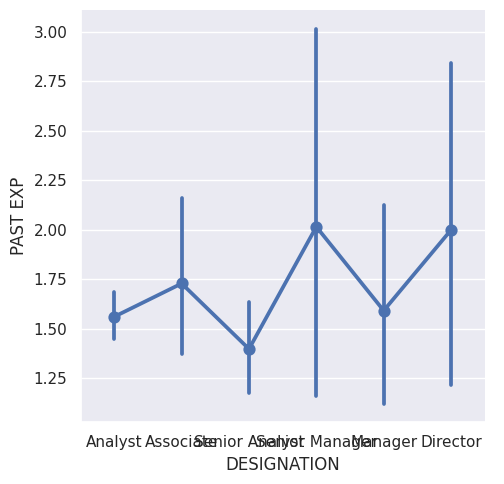

In [23]:
sns.catplot(x = 'DESIGNATION', y="PAST EXP", data = df, kind='point')

In [41]:
df[['PAST EXP','DESIGNATION']]

,PAST EXP,DESIGNATION
0,0,Analyst
2,0,Analyst
3,0,Analyst
6,0,Analyst
7,0,Analyst
...,...,...
2634,18,Senior Manager
2635,18,Analyst
2636,19,Analyst
2637,19,Analyst


<Axes: xlabel='DESIGNATION'>

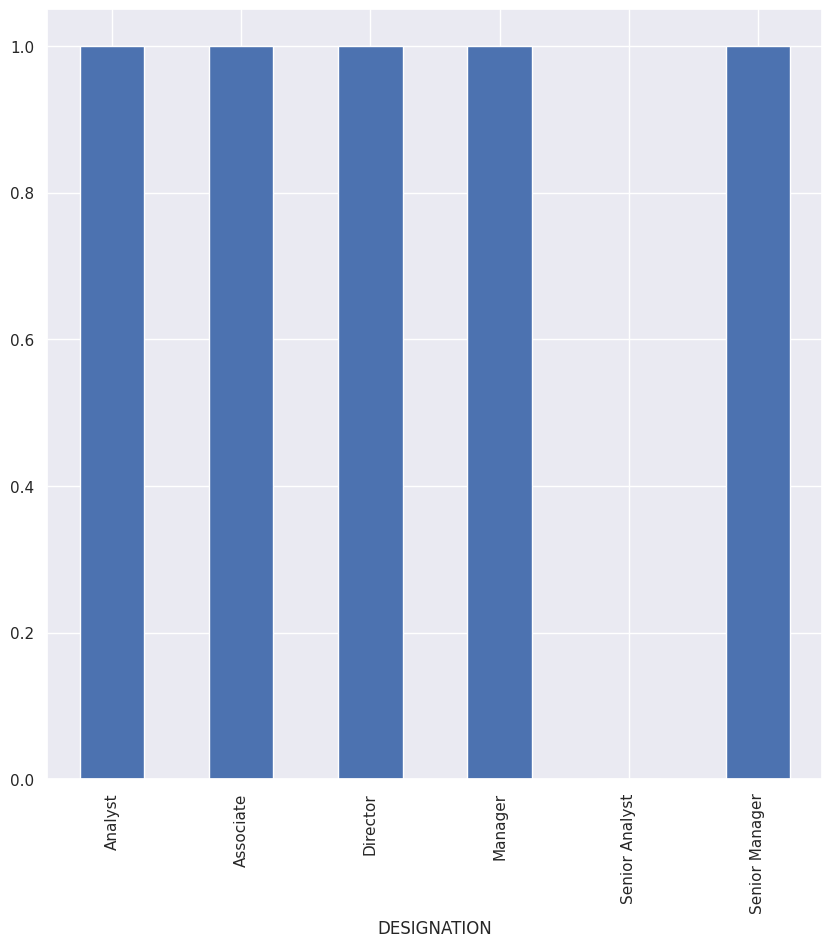

In [42]:
plt.figure(figsize = (10,10))
df.groupby('DESIGNATION')['PAST EXP'].median().plot.bar()

Designation: Analyst


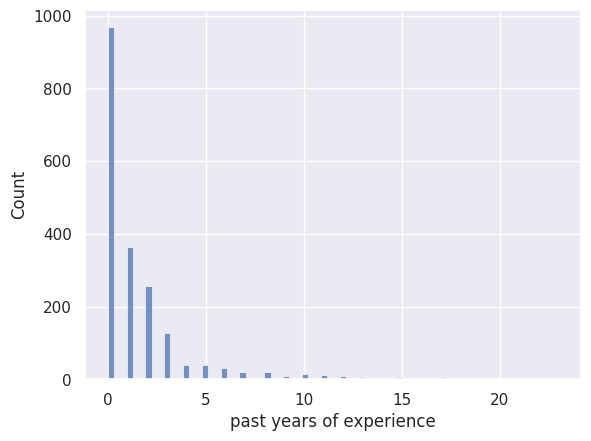


Designation: Associate


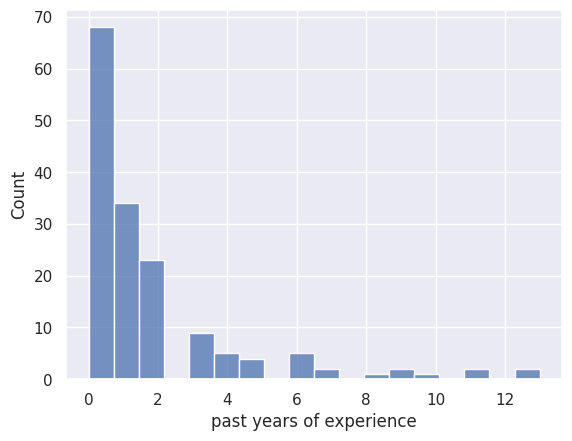


Designation: Director


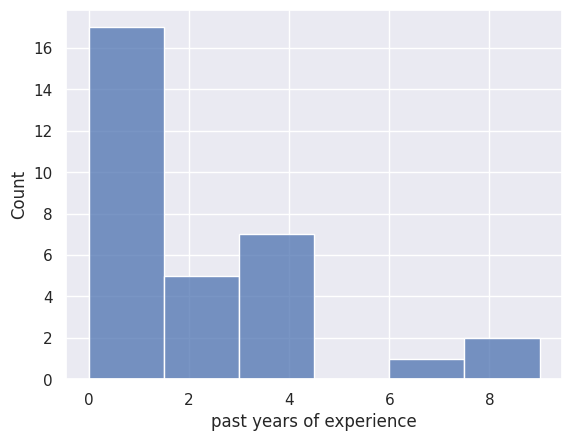


Designation: Manager


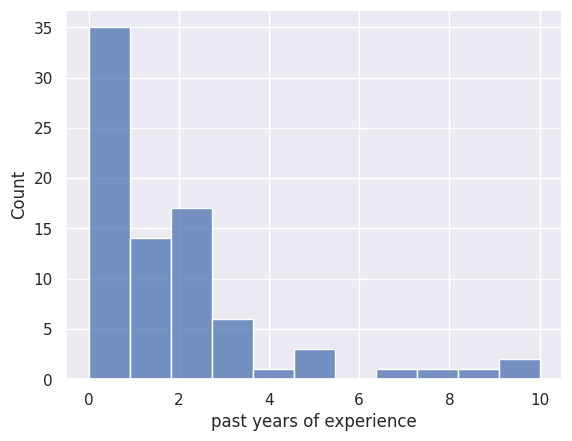


Designation: Senior Analyst


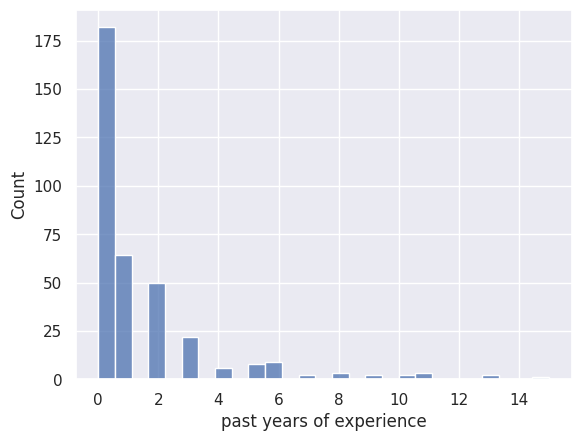


Designation: Senior Manager


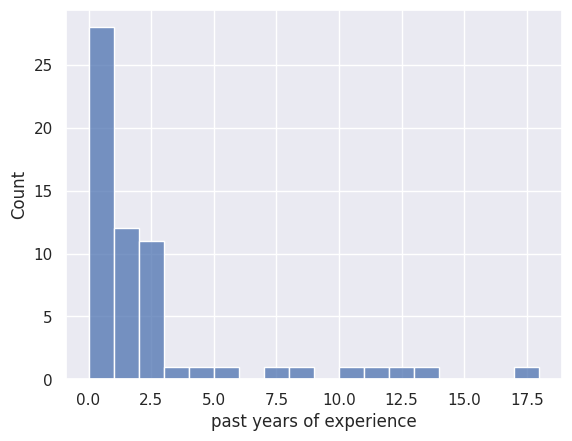

In [43]:
# Group the data by 'DESIGNATION'
#df['PAST+yearsMonths'] = df['PAST EXP']+df['yearsMonths']
#df['PAST+yearsMonths']  = df['PAST+yearsMonths'].astype(int)
grouped_data = df.groupby('DESIGNATION')['PAST EXP']

# Iterate over each group and print the 'PAST EXP' values
for designation, past_exp_values in grouped_data:
    print(f"Designation: {designation}")
    #print("PAST EXP values:",np.sort(past_exp_values.values))
    sns.histplot(x =past_exp_values.values)
    plt.xlabel('past years of experience')
    plt.show()
    #print("min = ", (past_exp_values.values))
    print()

In [44]:
df['PAST EXP'].value_counts()

0     1293
1      494
2      362
3      168
4       56
5       56
6       47
7       27
8       27
10      21
9       17
11      17
13      11
12      10
15       6
17       6
14       4
16       4
18       2
19       2
23       1
Name: PAST EXP, dtype: int64

#check for duplicates

In [45]:
duplicates = df.duplicated()
duplicates.value_counts()

False    2631
dtype: int64

In [50]:
duplicates

0       False
2       False
3       False
6       False
7       False
        ...  
2634    False
2635    False
2636    False
2637    False
2638    False
Length: 2631, dtype: bool

#explore for encoding

sample of the data 
   FIRST NAME LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  SALARY  \
0     TOMASA     ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   40001   
2      OLIVE      ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   40014   
3     CHERRY   AQUILAR   F  04-03-2013   01-07-2016     Analyst  21.0   40031   
6     ELLIOT    AGULAR   M  09-02-2013   01-07-2016     Analyst  21.0   40041   
7    JACQUES     AKMAL   M  12-05-2013   01-07-2016     Analyst  21.0   40043   

        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0    Finance         24.0               6.0      2.0         0  
2    Finance         23.0               7.0      3.0         0  
3         IT         22.0               8.0      3.0         0  
6  Marketing         19.0              11.0      5.0         0  
7  Marketing         29.0               1.0      2.0         0   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2631 entries, 0 to 2638
Data columns (total 13 col

/content/drive/MyDrive/machine learning projects /salary_prediction/custom_funcs.py:19: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('skewness of numerical data', df.skew())


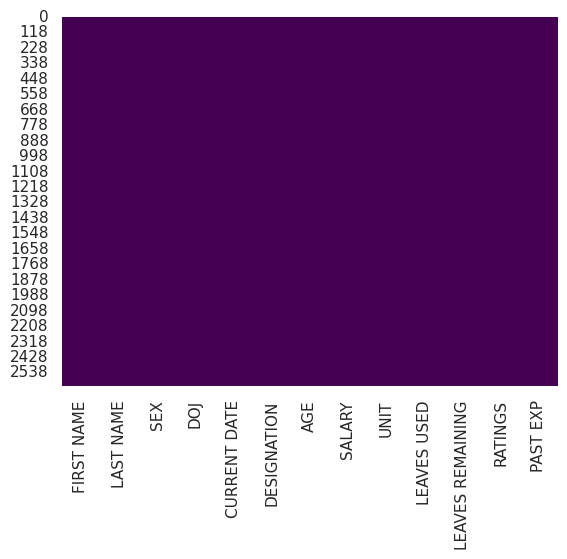

In [52]:
from custom_funcs import data_info
data_info(df)

nominal features(one-hot encoding): sex - unit

ordinal features(label encoding): designation - past exp grouped

#detect distribution

In [54]:
from custom_funcs import detect_distriution

/content/drive/MyDrive/machine learning projects /salary_prediction/custom_funcs.py:59: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.skew())


AGE                 2.101943
SALARY              4.459748
LEAVES USED        -0.011854
LEAVES REMAINING    0.011854
RATINGS             0.011910
PAST EXP            3.009658
dtype: float64

features that are highly positively skewed (skewness >1) are  ['AGE', 'SALARY', 'PAST EXP']
features that are highly negatively skewed (skewness <-1) are  []
features that are moderately positively skewed (0.5 < skewness < 1 ) are  []
features that are moderately negatively skewed (-0.5 < skewness < -1 ) are  []
features that are normally distributed (-0.5 < skewness < 0.5 ) are ['LEAVES USED', 'LEAVES REMAINING', 'RATINGS']



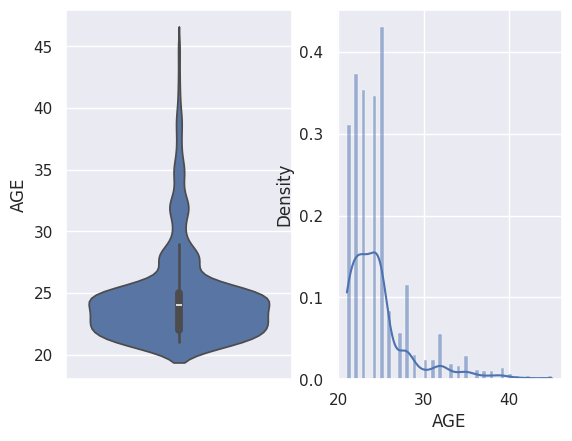

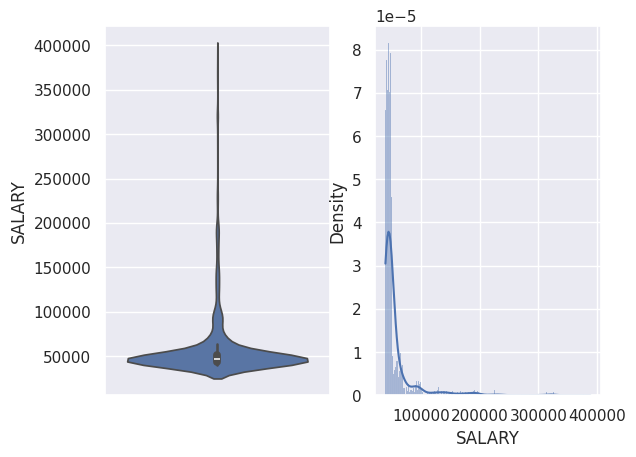

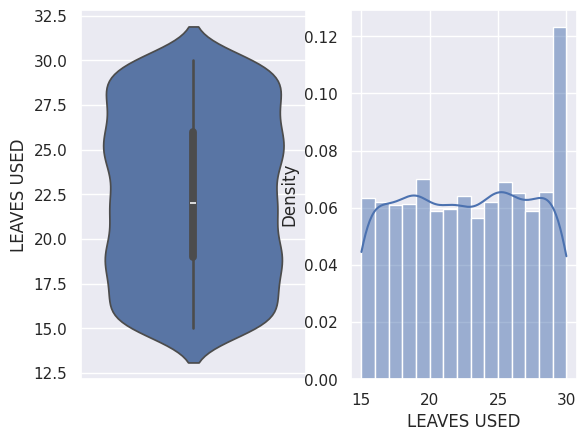

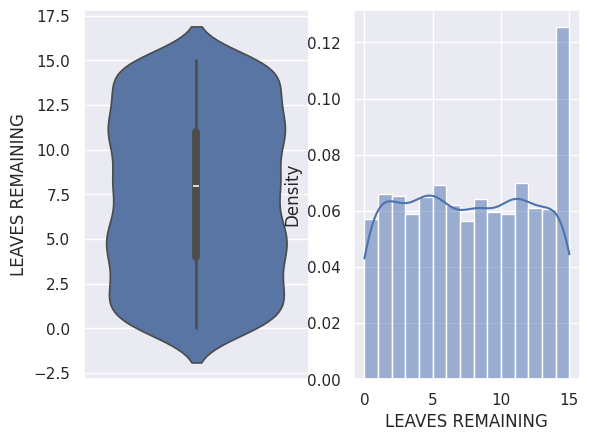

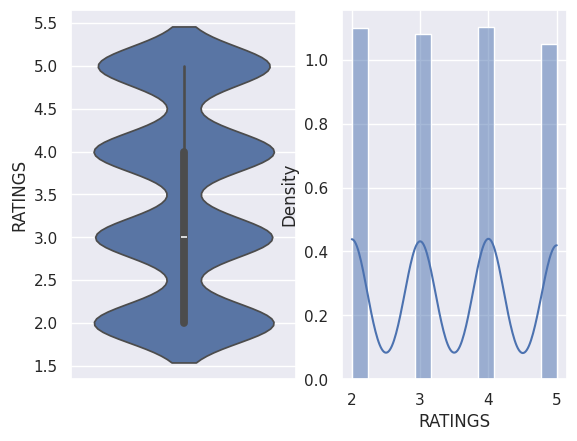

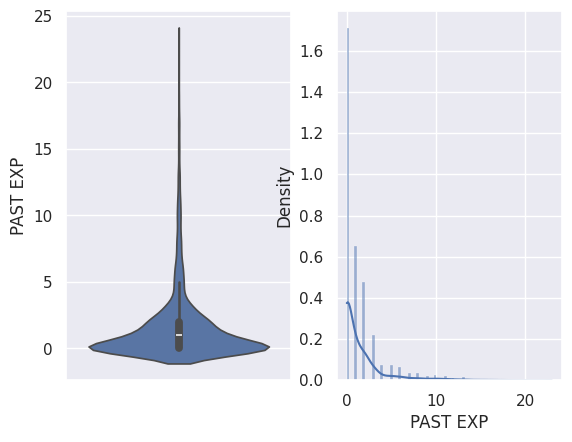

transformation  ['AGE', 'SALARY', 'PAST EXP']  to change the distribution


In [55]:
non_normal_features = detect_distriution(df)

view diffierent attemptes for transformation

In [56]:
from cutom_funcs import normality

ModuleNotFoundError: No module named 'cutom_funcs'

In [ ]:
normality(df,'AGE')

In [ ]:
normality(df,'SALARY')

In [ ]:
normality(df,'PAST EXP')

insight: 'AGE', 'SALARY', 'PAST EXP' are highly positively skewed so the best way to transform them is to log transform them

#normalization and standerdization

In [57]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000
mean,24.763208,58191.622197,22.501330,7.498670,3.485747,1.571646
std,3.908822,36919.511662,4.604748,4.604748,1.114579,2.731192
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43433.500000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46791.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51432.000000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [58]:
contin_features=['AGE',
 'SALARY',
 'LEAVES USED',
 'LEAVES REMAINING',
 'PAST EXP',]
contin_features

['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'PAST EXP']

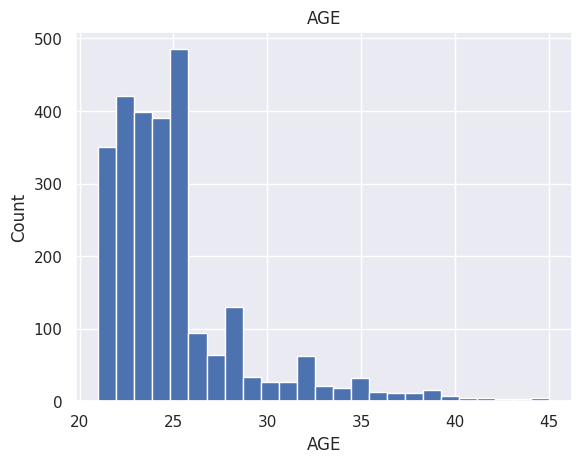

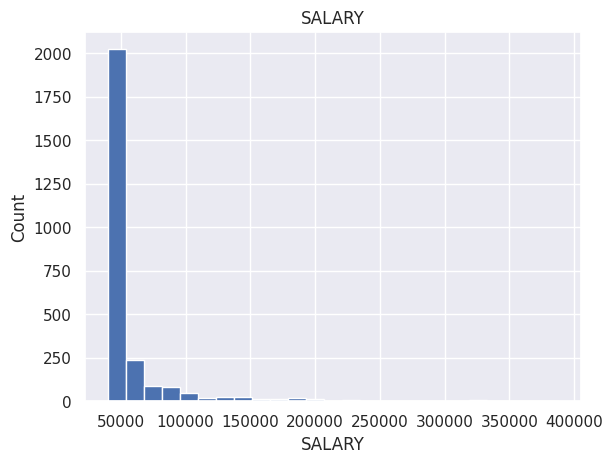

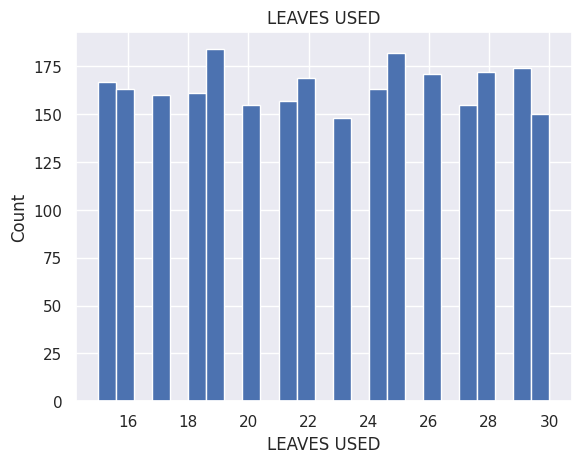

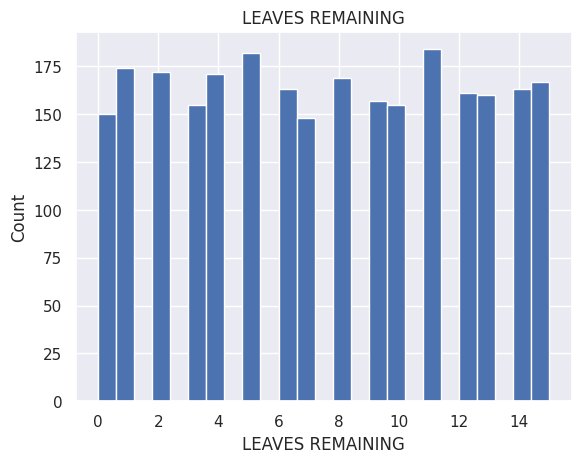

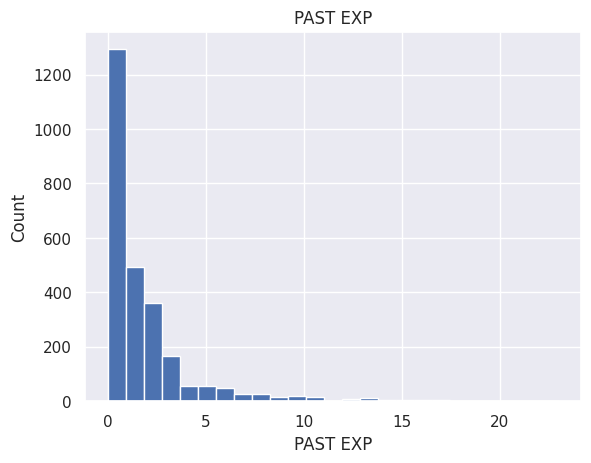

In [59]:
for feature in contin_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

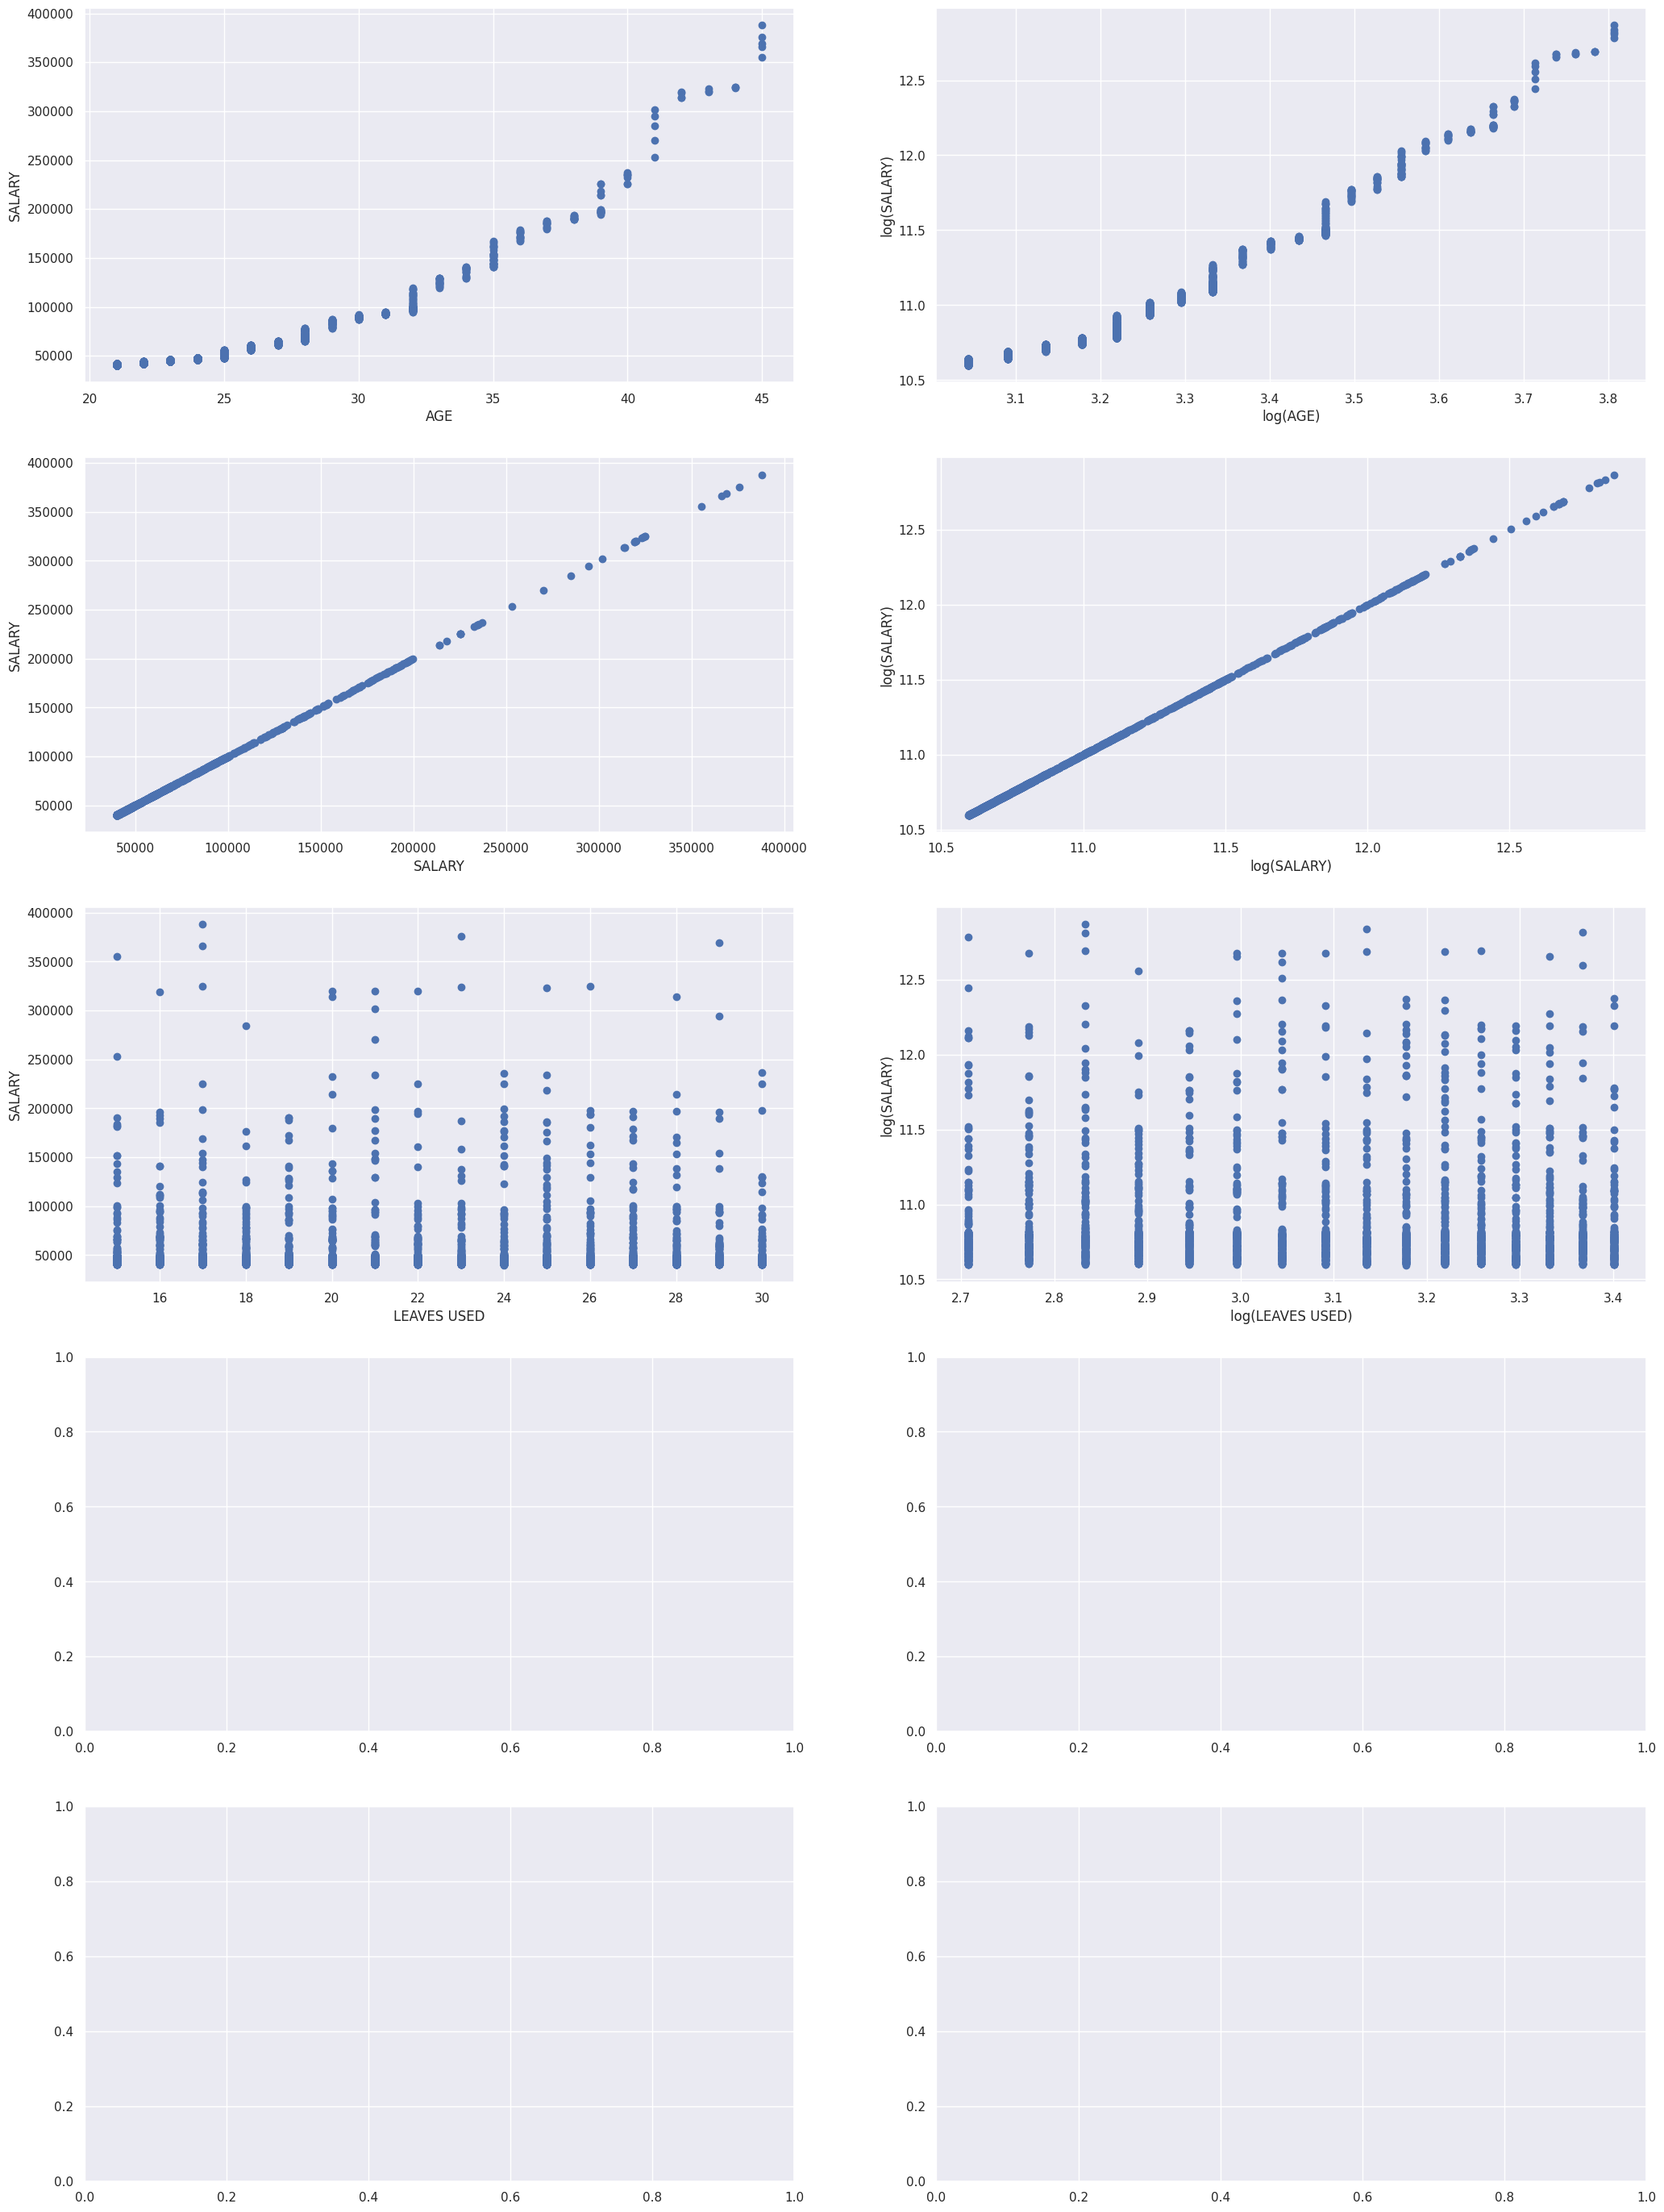

In [60]:
sns.set()
fig, axes = plt.subplots(len(contin_features), 2, figsize=(25, 35))
for i, feature in enumerate(contin_features):
    if 0 in df[feature].unique():
        pass
    else:
        axes[i, 0].scatter(df[feature], df['SALARY'])
        axes[i, 1].scatter(np.log(df[feature]), np.log(df['SALARY']))
        axes[i, 0].set_xlabel(feature)
        axes[i, 0].set_ylabel('SALARY')
        axes[i, 1].set_xlabel(f'log({feature})')
        axes[i, 1].set_ylabel('log(SALARY)')

plt.show()

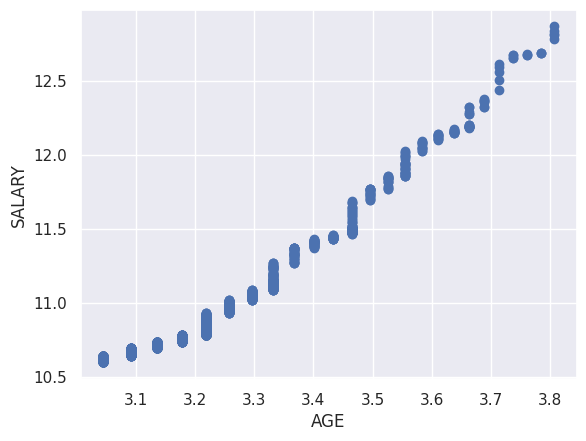

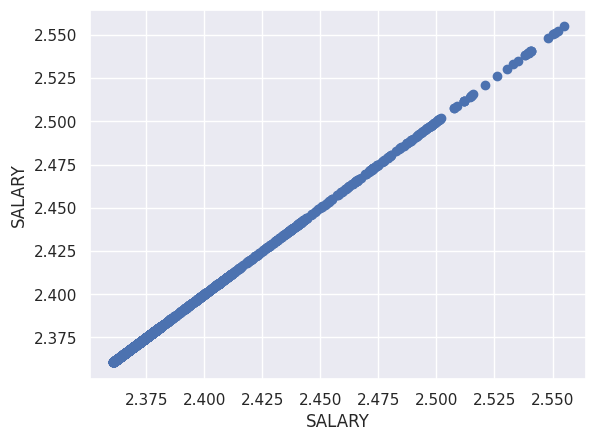

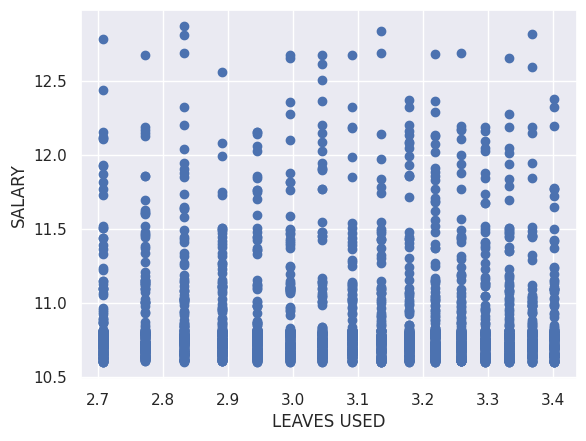

In [61]:
## We will be using logarithmic transformation


for feature in contin_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SALARY']=np.log(data['SALARY'])
        plt.scatter(data[feature],data['SALARY'])
        plt.xlabel(feature)
        plt.ylabel('SALARY')
        plt.show()


<Axes: xlabel='PAST EXP'>

<Figure size 700x500 with 0 Axes>

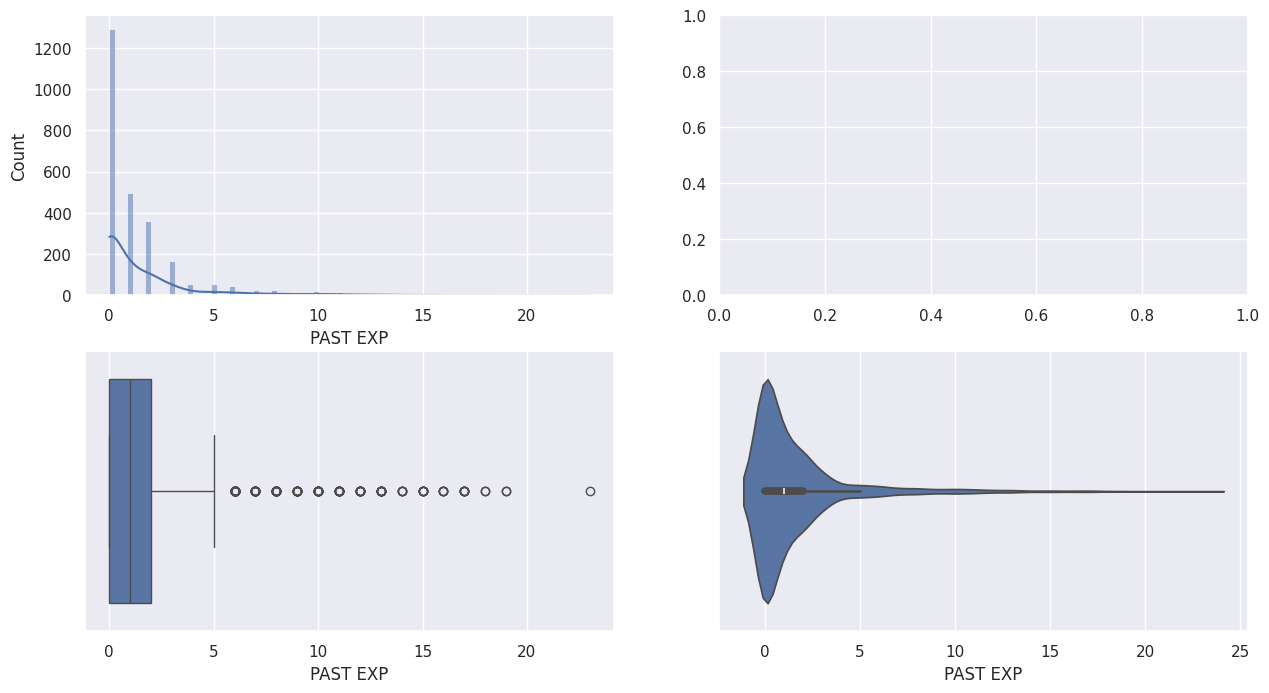

In [62]:
sns.set()
plt.figure(figsize = (7,5))
fig, axes = plt.subplots(2, 2,figsize = (15,8))
sns.histplot(x = df['PAST EXP'],ax=axes[0,0],kde = True)

sns.boxplot(data = df, x= 'PAST EXP',ax=axes[1,0])

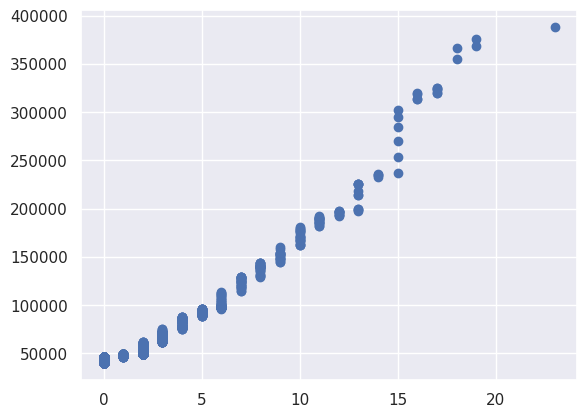

In [63]:
plt.scatter(x = df['PAST EXP'],y=df['SALARY'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


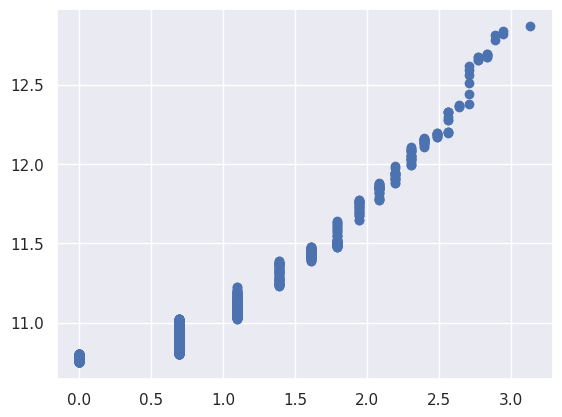

In [64]:
plt.scatter(np.log(df['PAST EXP']), np.log(df['SALARY']))

<Axes: xlabel='RATINGS'>

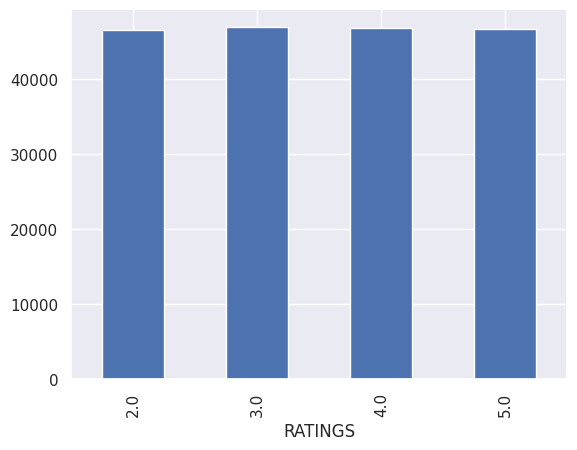

In [65]:
df.groupby('RATINGS')['SALARY'].median().plot.bar()